# Plot Timelines

In [1]:
# Data Loading
from collections import defaultdict
import pandas as pd
import json

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

C:\Users\Matheus\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Matheus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Matheus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## Specify Subreddit

In [2]:
SUBREDDIT = 'WhiteRights'
LABEL = 'ALL'

## Load Data

In [3]:
# Specify treatment subgroup
subgroup = 'inside'

# Load into dataframe
df_treatment_inside = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/treatment_{subgroup}.csv', index_col=0)
df_treatment_inside = df_treatment_inside[df_treatment_inside['Hate_Word_Pct'].isna()==False]
df_treatment_inside.sort_index(inplace=True)
df_treatment_inside = df_treatment_inside.reset_index().groupby('index').mean()
df_treatment_inside = df_treatment_inside[df_treatment_inside.index >= 0]
print(f'Earliest sample: {df_treatment_inside.index.min()}')
print(f'Latest sample: {df_treatment_inside.index.max()}')
print(f'Unique days: {df_treatment_inside.index.unique().shape[0]}')

Earliest sample: 0
Latest sample: 2563
Unique days: 1805


In [4]:
# Specify treatment subgroup
subgroup = 'outside'

# Load into dataframe
df_treatment_outside = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/treatment_{subgroup}.csv', index_col=0)
df_treatment_outside = df_treatment_outside[df_treatment_outside['Hate_Word_Pct'].isna()==False]
df_treatment_outside.sort_index(inplace=True)
df_treatment_outside = df_treatment_outside.reset_index().groupby('index').mean()
print(f'Earliest sample: {df_treatment_outside.index.min()}')
print(f'Latest sample: {df_treatment_outside.index.max()}')
print(f'Unique days: {df_treatment_outside.index.unique().shape[0]}')

Earliest sample: -3578
Latest sample: 4283
Unique days: 7064


In [5]:
# Specify treatment subgroup
subgroup = 'all'

# Load into dataframe
df_treatment_all = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/treatment_{subgroup}.csv', index_col=0)
df_treatment_all = df_treatment_all[df_treatment_all['Hate_Word_Pct'].isna()==False]
df_treatment_all.sort_index(inplace=True)
df_treatment_all = df_treatment_all.reset_index().groupby('index').mean()
print(f'Earliest sample: {df_treatment_all.index.min()}')
print(f'Latest sample: {df_treatment_all.index.max()}')
print(f'Unique days: {df_treatment_all.index.unique().shape[0]}')

Earliest sample: -3578
Latest sample: 4283
Unique days: 7064


In [6]:
# Specify treatment subgroup
subgroup = 'notbanned'

# Load into dataframe
df_treatment_notbanned = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/treatment_{subgroup}.csv', index_col=0)
df_treatment_notbanned = df_treatment_notbanned[df_treatment_notbanned['Hate_Word_Pct'].isna()==False]
df_treatment_notbanned.sort_index(inplace=True)
df_treatment_notbanned = df_treatment_notbanned.reset_index().groupby('index').mean()
print(f'Earliest sample: {df_treatment_notbanned.index.min()}')
print(f'Latest sample: {df_treatment_notbanned.index.max()}')
print(f'Unique days: {df_treatment_notbanned.index.unique().shape[0]}')

Earliest sample: -3578
Latest sample: 4283
Unique days: 7064


In [7]:
# Specify treatment subgroup
subgroup = 'banned'

# Load into dataframe
df_treatment_banned = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/treatment_{subgroup}.csv', index_col=0)
df_treatment_banned = df_treatment_banned[df_treatment_banned['Hate_Word_Pct'].isna()==False]
df_treatment_banned.sort_index(inplace=True)
df_treatment_banned = df_treatment_banned.reset_index().groupby('index').mean()
print(f'Earliest sample: {df_treatment_banned.index.min()}')
print(f'Latest sample: {df_treatment_banned.index.max()}')
print(f'Unique days: {df_treatment_banned.index.unique().shape[0]}')

Earliest sample: -2160
Latest sample: 3332
Unique days: 3844


In [8]:
# Load into dataframe
df_control = pd.read_csv(f'../word_counts/{SUBREDDIT}/{LABEL}/control.csv', index_col=0)
df_control = df_control[df_control['Hate_Word_Pct'].isna()==False]
df_control.sort_index(inplace=True)
df_control = df_control.reset_index().groupby('index').mean()
print(f'Earliest sample: {df_control.index.min()}')
print(f'Latest sample: {df_control.index.max()}')
print(f'Unique days: {df_control.index.unique().shape[0]}')

Earliest sample: -4045
Latest sample: 3984
Unique days: 7265


## Plot Daily Data

In [9]:
# Define the time period
number_of_days= 200

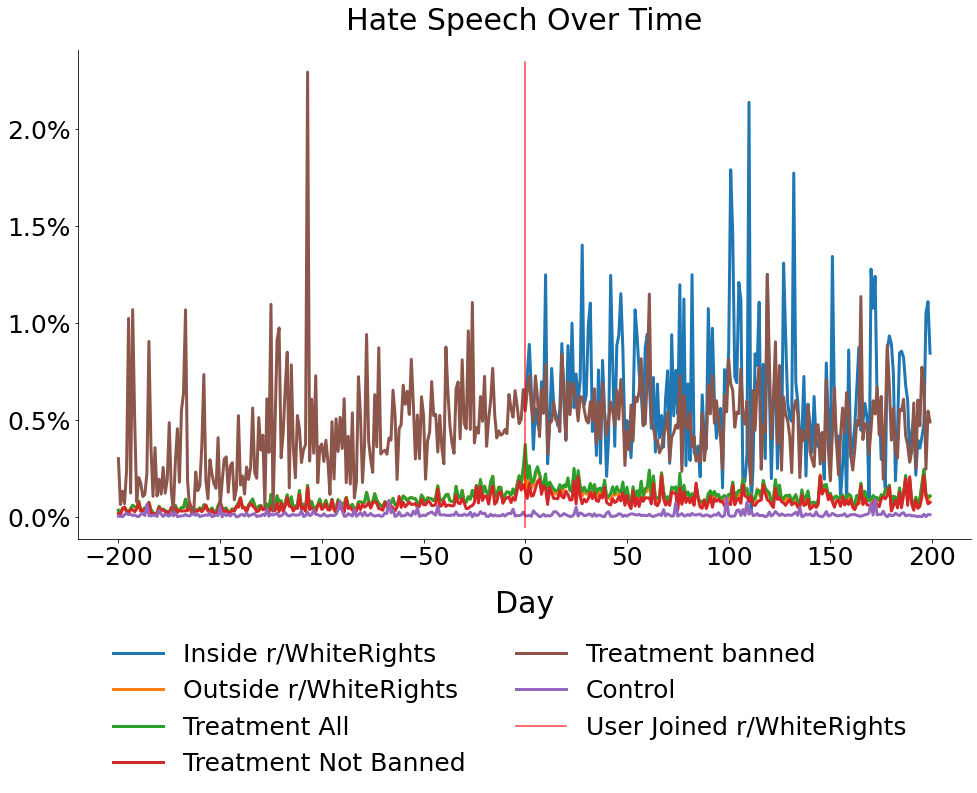

In [10]:
fig, ax = plt.subplots(figsize=(16,9))

# Treatment Inside Treatment
plt.plot(df_treatment_inside[(df_treatment_inside.index >= -number_of_days) & (df_treatment_inside.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C0', label=f'Inside r/{SUBREDDIT}')

# Treatment Outside Treatment
plt.plot(df_treatment_outside[(df_treatment_outside.index >= -number_of_days) & (df_treatment_outside.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C1', label=f'Outside r/{SUBREDDIT}')

# Treatment All
plt.plot(df_treatment_all[(df_treatment_all.index >= -number_of_days) & (df_treatment_all.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C2', label=f'Treatment All')

# Treatment Not-Banned
plt.plot(df_treatment_notbanned[(df_treatment_notbanned.index >= -number_of_days) & (df_treatment_notbanned.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C3', label=f'Treatment Not Banned')

# Treatment Banned
plt.plot(df_treatment_banned[(df_treatment_banned.index >= -number_of_days) & (df_treatment_banned.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C5', label=f'Treatment banned')

# Control
plt.plot(df_control[(df_control.index >= -number_of_days) & (df_control.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C4', label=f'Control')

# Add join date
plt.axvline(x=0, color='red', ymin=0.025, ymax=0.975, alpha=0.75, label=f'User Joined r/{SUBREDDIT}')

# Text
plt.title('Hate Speech Over Time', size=30, pad=20)
plt.xlabel('Day', fontsize=30, weight='normal', labelpad=20)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)

# Put a legend below the plot
plt.figlegend(loc='lower center', fontsize=25, ncol=2, bbox_to_anchor=(0.5, -0.275), frameon=False)

# Axis
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.locator_params(axis ='y', nbins=6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
#plt.savefig(f"../figures_timeseries/{SUBREDDIT}_Hate_Speech_Percentage_Day1.png", bbox_inches='tight')
plt.show()

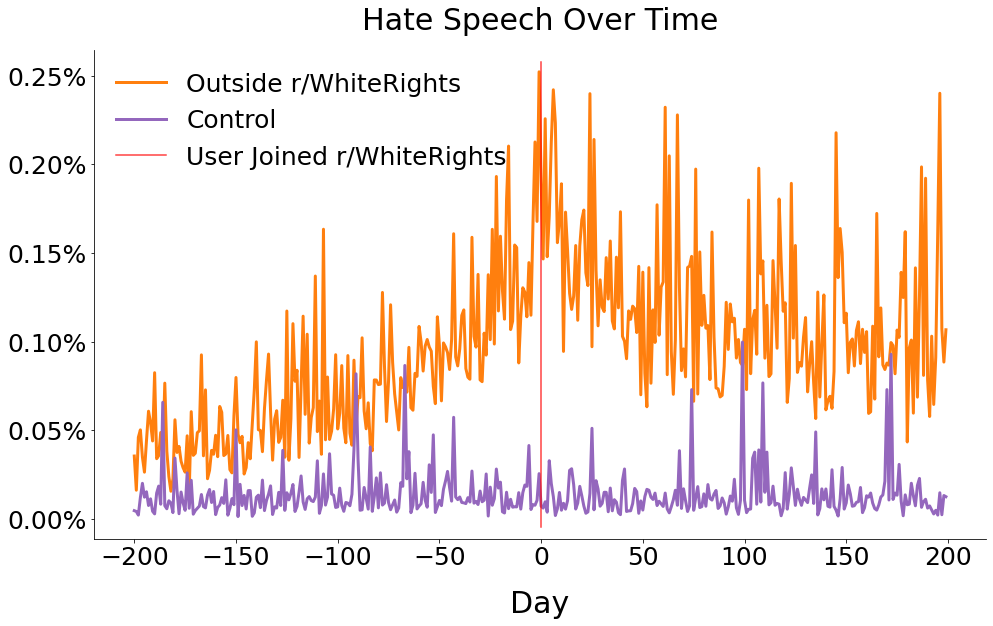

In [11]:
fig, ax = plt.subplots(figsize=(16,9))

# Treatment Inside Treatment
# plt.plot(df_treatment_inside[(df_treatment_inside.index >= -number_of_days) & (df_treatment_inside.index < number_of_days)]['Hate_Word_Pct'],
#          lw=3, color='C0', label=f'Inside r/{SUBREDDIT}')

# Treatment Outside Treatment
plt.plot(df_treatment_outside[(df_treatment_outside.index >= -number_of_days) & (df_treatment_outside.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C1', label=f'Outside r/{SUBREDDIT}')

# Treatment All
# plt.plot(df_treatment_all[(df_treatment_all.index >= -number_of_days) & (df_treatment_all.index < number_of_days)]['Hate_Word_Pct'],
#          lw=3, color='C2', label=f'Treatment All')

# # Treatment Not-Banned
# plt.plot(df_treatment_notbanned[(df_treatment_notbanned.index >= -number_of_days) & (df_treatment_notbanned.index < number_of_days)]['Hate_Word_Pct'],
#          lw=3, color='C3', label=f'Treatment Not Banned')

# # Treatment Banned
# plt.plot(df_treatment_banned[(df_treatment_banned.index >= -number_of_days) & (df_treatment_banned.index < number_of_days)]['Hate_Word_Pct'],
#          lw=3, color='C5', label=f'Treatment banned')

# Control
plt.plot(df_control[(df_control.index >= -number_of_days) & (df_control.index < number_of_days)]['Hate_Word_Pct'],
         lw=3, color='C4', label=f'Control')

# Add join date
plt.axvline(x=0, color='red', ymin=0.025, ymax=0.975, alpha=0.75, label=f'User Joined r/{SUBREDDIT}')

# Text
plt.legend(fontsize=25, frameon=False)
plt.title('Hate Speech Over Time', size=30, pad=20)
plt.xlabel('Day', fontsize=30, weight='normal', labelpad=20)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)

# Axis
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.locator_params(axis ='y', nbins=6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
#plt.savefig(f"../figures_timeseries_aggregated/{SUBREDDIT}_Hate_Speech_Percentage_Day2.png", bbox_inches='tight')
plt.show()

## Group Every 7 Days

In [12]:
# Bin size
n = 7

# Group dataframes in weekly bins
df_treatment_inside_weekly = df_treatment_inside.T.groupby([[i//n for i in df_treatment_inside.T.columns]], axis = 1).mean().T
df_treatment_outside_weekly = df_treatment_outside.T.groupby([[i//n for i in df_treatment_outside.T.columns]], axis = 1).mean().T
df_treatment_all_weekly = df_treatment_all.T.groupby([[i//n for i in df_treatment_all.T.columns]], axis = 1).mean().T
df_treatment_notbanned_weekly = df_treatment_notbanned.T.groupby([[i//n for i in df_treatment_notbanned.T.columns]], axis = 1).mean().T
df_treatment_banned_weekly = df_treatment_banned.T.groupby([[i//n for i in df_treatment_banned.T.columns]], axis = 1).mean().T
df_control_weekly = df_control.T.groupby([[i//n for i in df_control.T.columns]], axis = 1).mean().T

In [13]:
df_treatment_inside_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_treatment_inside_weekly.csv', index=True)
df_treatment_outside_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_treatment_outside_weekly.csv', index=True)
df_treatment_all_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_treatment_all_weekly.csv', index=True)
df_treatment_notbanned_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_treatment_notbanned_weekly.csv', index=True)
df_treatment_banned_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_treatment_banned_weekly.csv', index=True)
df_control_weekly.to_csv(f'Timeseries_Plot_Data_{SUBREDDIT}_{LABEL}_df_control_weekly.csv', index=True)

### Plot

In [14]:
# Define the time period
number_of_weeks = 26

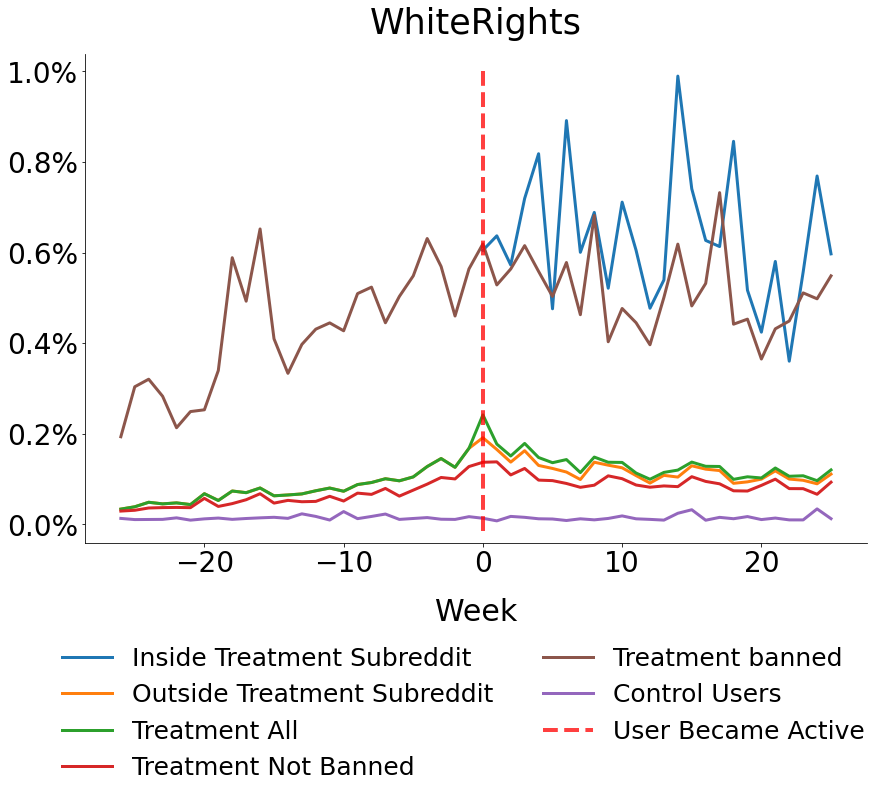

In [15]:
fig, ax = plt.subplots(figsize=(14,9))

# Treatment Inside Treatment
plt.plot(df_treatment_inside_weekly[(df_treatment_inside_weekly.index >= -number_of_weeks) & (df_treatment_inside_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C0', label=f'Inside Treatment Subreddit')

# Treatment Outside Treatment
plt.plot(df_treatment_outside_weekly[(df_treatment_outside_weekly.index >= -number_of_weeks) & (df_treatment_outside_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C1', label=f'Outside Treatment Subreddit')

# Treatment All
plt.plot(df_treatment_all_weekly[(df_treatment_all_weekly.index >= -number_of_weeks) & (df_treatment_all_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C2', label=f'Treatment All')

# Treatment Not-Banned
plt.plot(df_treatment_notbanned_weekly[(df_treatment_notbanned_weekly.index >= -number_of_weeks) & (df_treatment_notbanned_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C3', label=f'Treatment Not Banned')

# Treatment Banned
plt.plot(df_treatment_banned_weekly[(df_treatment_banned_weekly.index >= -number_of_weeks) & (df_treatment_banned_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C5', label=f'Treatment banned')

# Control
plt.plot(df_control_weekly[(df_control_weekly.index >= -number_of_weeks) & (df_control_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C4', label=f'Control Users')

# Add join date
plt.axvline(x=0, color='red', ymin=0.025, ymax=0.975, alpha=0.75, linestyle='--', lw=4, label=f'User Became Active')

# Text
plt.title(f'{SUBREDDIT}', size=35, pad=20) #Hate Speech Over Time
plt.xlabel('Week', fontsize=30, weight='normal', labelpad=20)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)

# Put a legend below the plot
plt.figlegend(loc='lower center', fontsize=25, ncol=2, bbox_to_anchor=(0.5, -0.275), frameon=False)

# Axis
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
ax.locator_params(axis ='y', nbins=6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
plt.savefig(f"../figures_timeseries_aggregated/Hate_Speech_Percentage_Week_{SUBREDDIT}.png", bbox_inches='tight')
plt.show()

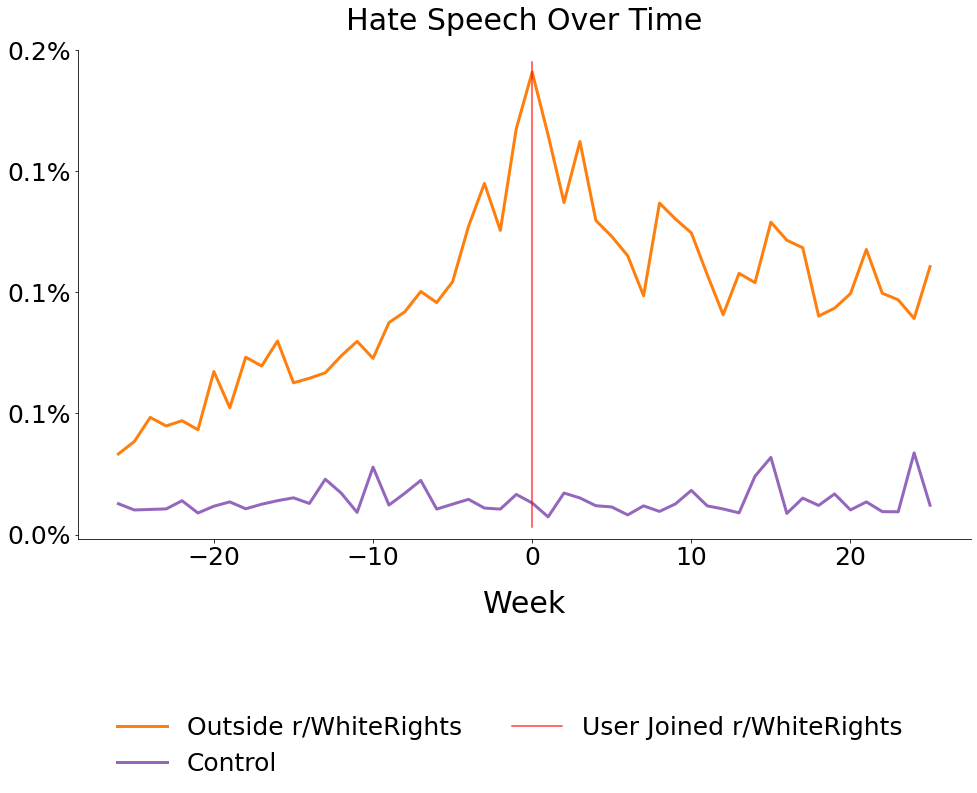

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

# Treatment Inside Treatment
# plt.plot(df_treatment_inside_weekly[(df_treatment_inside_weekly.index >= -number_of_weeks) & (df_treatment_inside_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
#          lw=3, color='C0', label=f'Inside r/{SUBREDDIT}')

# Treatment Outside Treatment
plt.plot(df_treatment_outside_weekly[(df_treatment_outside_weekly.index >= -number_of_weeks) & (df_treatment_outside_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C1', label=f'Outside r/{SUBREDDIT}')

# # Treatment All
# plt.plot(df_treatment_all_weekly[(df_treatment_all_weekly.index >= -number_of_weeks) & (df_treatment_all_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
#          lw=3, color='C2', label=f'Treatment All')

# # Treatment Not-Banned
# plt.plot(df_treatment_notbanned_weekly[(df_treatment_notbanned_weekly.index >= -number_of_weeks) & (df_treatment_notbanned_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
#          lw=3, color='C3', label=f'Treatment Not Banned')

# # Treatment Banned
# plt.plot(df_treatment_banned_weekly[(df_treatment_banned_weekly.index >= -number_of_weeks) & (df_treatment_banned_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
#          lw=3, color='C5', label=f'Treatment banned')

# Control
plt.plot(df_control_weekly[(df_control_weekly.index >= -number_of_weeks) & (df_control_weekly.index < number_of_weeks)]['Hate_Word_Pct'],
         lw=3, color='C4', label=f'Control')

# Add join date
plt.axvline(x=0, color='red', ymin=0.025, ymax=0.975, alpha=0.75, label=f'User Joined r/{SUBREDDIT}')

# Text
plt.title('Hate Speech Over Time', size=30, pad=20)
plt.xlabel('Week', fontsize=30, weight='normal', labelpad=20)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)

# Put a legend below the plot
plt.figlegend(loc='lower center', fontsize=25, ncol=2, bbox_to_anchor=(0.5, -0.275), frameon=False)

# Axis
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.locator_params(axis ='y', nbins=6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
#plt.savefig(f"../figures_timeseries_aggregated/{SUBREDDIT}_Hate_Speech_Percentage_Week2.png", bbox_inches='tight')
plt.show()

## Calcualte Percentage Increase in Hate Words

In [17]:
bandwidth = 65

#### Inside Treatment

In [18]:
# Get only data before user joined target subreddit
pre_joining = df_treatment_inside[(df_treatment_inside.index < 0) & (df_treatment_inside.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_treatment_inside[(df_treatment_inside.index >= 0) & (df_treatment_inside.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.00000
WhiteRights hate word percentage after joining: 0.43117
That is an increase of 0.43117 percentage points
That is an increase of inf %


C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


#### Outside Treatment

In [19]:
# Get only data before user joined target subreddit
pre_joining = df_treatment_outside[(df_treatment_outside.index < 0) & (df_treatment_outside.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_treatment_outside[(df_treatment_outside.index >= 0) & (df_treatment_outside.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.07477
WhiteRights hate word percentage after joining: 0.09110
That is an increase of 0.01633 percentage points
That is an increase of 21.84 %


#### Treatment All

In [20]:
# Get only data before user joined target subreddit
pre_joining = df_treatment_all[(df_treatment_all.index < 0) & (df_treatment_all.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_treatment_all[(df_treatment_all.index >= 0) & (df_treatment_all.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.07477
WhiteRights hate word percentage after joining: 0.10354
That is an increase of 0.02877 percentage points
That is an increase of 38.48 %


#### Treatment Not Banned

In [21]:
# Get only data before user joined target subreddit
pre_joining = df_treatment_notbanned[(df_treatment_notbanned.index < 0) & (df_treatment_notbanned.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_treatment_notbanned[(df_treatment_notbanned.index >= 0) & (df_treatment_notbanned.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.05463
WhiteRights hate word percentage after joining: 0.06939
That is an increase of 0.01476 percentage points
That is an increase of 27.02 %


#### Treatment Banned

In [22]:
# Get only data before user joined target subreddit
pre_joining = df_treatment_banned[(df_treatment_banned.index < 0) & (df_treatment_banned.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_treatment_banned[(df_treatment_banned.index >= 0) & (df_treatment_banned.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.34451
WhiteRights hate word percentage after joining: 0.36633
That is an increase of 0.02182 percentage points
That is an increase of 6.33 %


#### Control

In [23]:
# Get only data before user joined target subreddit
pre_joining = df_control[(df_control.index < 0) & (df_control.index >= -bandwidth)]

# Get only data after user joined target subreddit
post_joining = df_control[(df_control.index >= 0) & (df_control.index < bandwidth)]

# Calculate the overall ratio of hate words in both timespans
hate_word_pct_pre = pre_joining.sum()['Hate_Word_Pct']
hate_word_pct_post = post_joining.sum()['Hate_Word_Pct']
print(f"{SUBREDDIT} hate word percentage before joining: {hate_word_pct_pre:.5f}")
print(f"{SUBREDDIT} hate word percentage after joining: {hate_word_pct_post:.5f}")

# Calculate change in percentage points
pct_points = hate_word_pct_post - hate_word_pct_pre
print(f"That is an increase of {pct_points:.5f} percentage points")

# Calculate the percentage change
pct_increase = 100 * (hate_word_pct_post - hate_word_pct_pre) / hate_word_pct_pre
print(f"That is an increase of {pct_increase:.2f} %")

WhiteRights hate word percentage before joining: 0.00932
WhiteRights hate word percentage after joining: 0.00748
That is an increase of -0.00184 percentage points
That is an increase of -19.74 %


## End